### Bag of Words Sentiment Analysis


- In this Project we are going to classify whether a given movie review is **positive or negative**.
- We are going to use Bag of words for pre-processing the text and apply different classification algorithms.
- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

In [2]:
#Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

### **About Data: IMDB Dataset**

Credits: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download


- This data consists of two columns.
        - review
        - sentiment
- Reviews are the statements given by users after watching the movie.
- sentiment feature tells whether the given review is positive or negative.

In [4]:
#1. read the data provided in the same directory with name 'movies_sentiment_data.csv' and store it in df variable
df = pd.read_csv("movies_sentiment_data.csv")


#2. print the shape of the data
print(df.shape)

#3. print top 5 datapoints
df.head()

(19000, 2)


,review,sentiment
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive
1,I enjoyed the movie and the story immensely! I...,positive
2,I had a hard time sitting through this. Every ...,negative
3,It's hard to imagine that anyone could find th...,negative
4,This is one military drama I like a lot! Tom B...,positive


In [5]:
#creating a new column "Category" which represent 1 if the sentiment is positive or 0 if it is negative
df['Category'] = df['sentiment'].apply(lambda x: 1 if x =='positive' else 0)

In [6]:
#check the distribution of 'Category' and see whether the Target labels are balanced or not.

df['Category'].value_counts()

Category
1    9500
0    9500
Name: count, dtype: int64

In [7]:
#Do the 'train-test' splitting with test size of 20%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.review, df.Category, test_size=0.2)

**Random Forest**

1. using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative.

**Note:**
- using CountVectorizer for pre-processing the text.

- using **Random Forest** as the classifier with estimators as 50 and criterion as entropy.
- print the classification report.

**References**:

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [9]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer()),                                                    #initializing the vectorizer
    ('random_forest', (RandomForestClassifier(n_estimators=50, criterion='entropy')))      #using the RandomForest classifier
])



#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1882
           1       0.83      0.82      0.82      1918

    accuracy                           0.82      3800
   macro avg       0.82      0.82      0.82      3800
weighted avg       0.82      0.82      0.82      3800



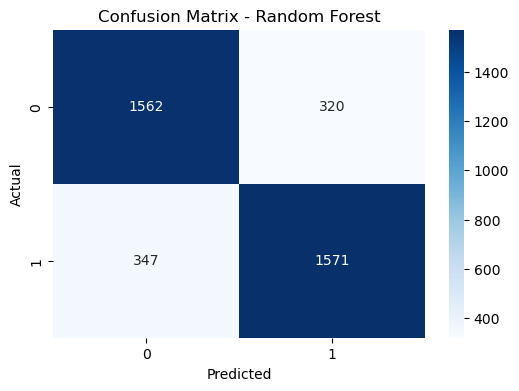

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming predictions have been made using the pipeline clf as you provided:
y_pred_rf = clf.predict(X_test)  # For RandomForest
# Similarly, for KNN and MultinomialNB, reuse clf by setting the appropriate classifier

# Confusion matrix for RandomForest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting confusion matrix for RandomForest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- As you can see above, for both the classes (positive and negative sentiment) we got more than 80% precision, recall and f1- score. This seems to be an acceptable performance.

**K-Nearest-Neighbours**

1. using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative..

**Note:**
- using CountVectorizer for pre-processing the text.
- using **KNN** as the classifier with n_neighbors of 10 and metric as 'euclidean'.
- printing the classification report.

**References**:

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [13]:

#1. create a pipeline object
clf = Pipeline([
                
     ('vectorizer', CountVectorizer()),   
      ('KNN', (KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))   #using the KNN classifier with 10 neighbors 
])


#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1882
           1       0.64      0.63      0.64      1918

    accuracy                           0.64      3800
   macro avg       0.64      0.64      0.64      3800
weighted avg       0.64      0.64      0.64      3800



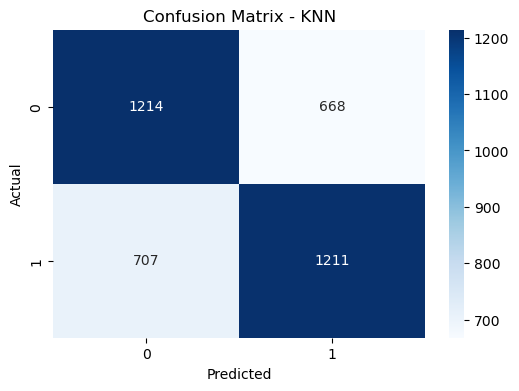

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming predictions have been made using the pipeline clf as you provided:
y_pred_rf = clf.predict(X_test)  # For RandomForest
# Similarly, for KNN and MultinomialNB, reuse clf by setting the appropriate classifier

# Confusion matrix for RandomForest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting confusion matrix for RandomForest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - KNN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- Hmmm..here the performance of various metrics (precision, recall etc.) seem to be lower (~60 %). Let's try one more classifier and then discuss why performance is varying so much

**Multinomial Naive Bayes**

1. using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative..

**Note:**
- using CountVectorizer for pre-processing the text.
- ussing **Multinomial Naive Bayes** as the classifier.
- printing the classification report.

**References**:

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html



In [17]:

#1. create a pipeline object
clf = Pipeline([
                
     ('vectorizer', CountVectorizer()),   
      ('Multi NB', MultinomialNB())   #using the Multinomial Naive Bayes classifier 
])


#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1882
           1       0.87      0.81      0.84      1918

    accuracy                           0.85      3800
   macro avg       0.85      0.85      0.85      3800
weighted avg       0.85      0.85      0.85      3800



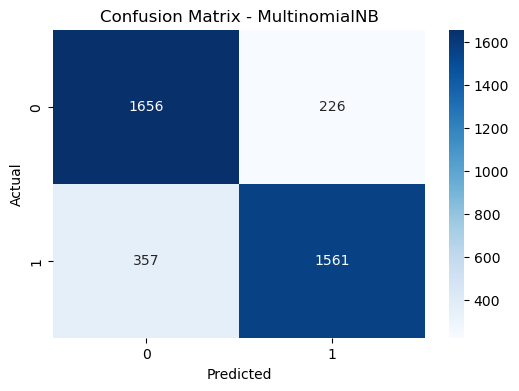

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming predictions have been made using the pipeline clf as you provided:
y_pred_rf = clf.predict(X_test)  # For RandomForest
# Similarly, for KNN and MultinomialNB, reuse clf by setting the appropriate classifier

# Confusion matrix for RandomForest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting confusion matrix for RandomForest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - MultinomialNB')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

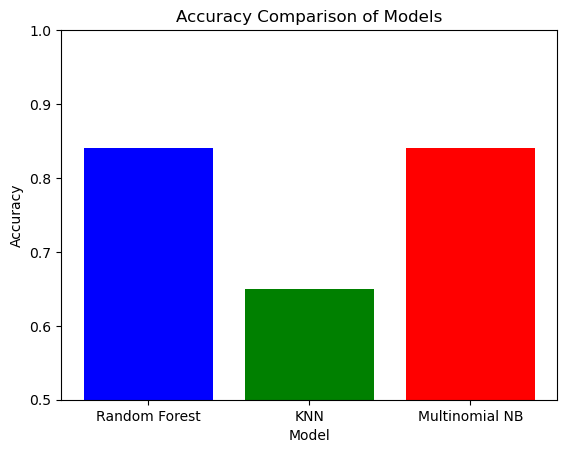

In [19]:
import matplotlib.pyplot as plt

# Accuracy scores for the models (replace with actual accuracies)
accuracy_rf = 0.84  # Accuracy for RandomForest
accuracy_knn = 0.65  # Accuracy for KNN
accuracy_mnb = 0.84  # Accuracy for MultinomialNB

accuracy_scores = [accuracy_rf, accuracy_knn, accuracy_mnb]
models = ['Random Forest', 'KNN', 'Multinomial NB']

# Plotting the accuracy comparison
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.title('Accuracy Comparison of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)  # Setting y-axis limit from 50% to 100%
plt.show()


- That's great! MultinomialNB model for both the classes (positive and negative sentiment) we got more than 80% precision, recall and f1- score and performed equally good with Random Forest. This seems to be an acceptable performance.

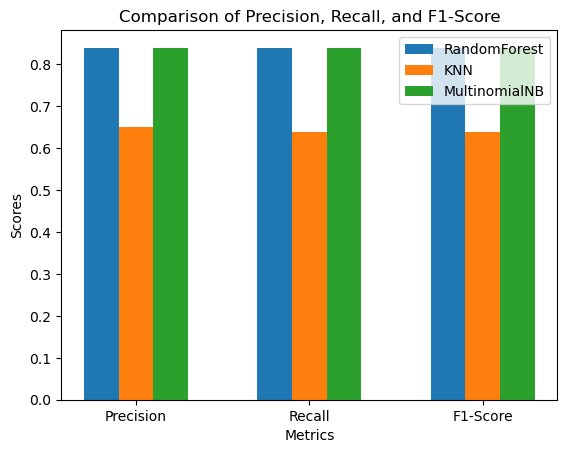

In [21]:
import numpy as np

# Metrics obtained from the classification report (replace with actual scores)
# Example values for demonstration (use values from your results)
metrics_rf = [0.84, 0.84, 0.84]  # Precision, Recall, F1 for RandomForest
metrics_knn = [0.65, 0.64, 0.64]  # Precision, Recall, F1 for KNN
metrics_mnb = [0.84, 0.84, 0.84]  # Precision, Recall, F1 for MultinomialNB

# Labels for groups
labels = ['Precision', 'Recall', 'F1-Score']

x = np.arange(len(labels))  # Label locations
width = 0.2  # Width of bars

# Creating grouped bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(x - width, metrics_rf, width, label='RandomForest')
bar2 = ax.bar(x, metrics_knn, width, label='KNN')
bar3 = ax.bar(x + width, metrics_mnb, width, label='MultinomialNB')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


### Can you write some observations of why model like KNN fails to produce good results unlike RandomForest and MultinomialNB?

- As Machine learning algorithms does not work on Text data directly, we need to convert them into numeric vector and feed that into models while training.
- In this process, we convert text into a very **high dimensional numeric vector** using the technique of Bag of words.
- Model like K-Nearest Neighbours(KNN) doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension. In higher dimensional space, the cost to calculate distance becomes expensive and hence impacts the performance of model.
- The easy calculation of probabilities for the words in corpus(Bag of words) and storing them in contigency table is the major reason for the Multinomial NaiveBayes to be a text classification friendly algorithm.
- As Random Forest uses Bootstrapping(Row and column Sampling) with many decision tree and overcomes the high variance and overfitting of high dimensional data and also uses feature importance of words for better classifing the categories.
- Machine Learning is like trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which give good results and satisfy the requirements like latency, interpretability etc.

Refer these resources to get good idea:
- https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
- https://analyticsindiamag.com/naive-bayes-why-is-it-favoured-for-text-related-tasks/